In [2]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 경고 뜨지 않게
import warnings
warnings.filterwarnings('ignore')

#저장라이브러리
import pickle

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 표준화
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# LabelEncoder
from sklearn.preprocessing import LabelEncoder

# 데이터를 학습용과 검증용으로 나눈다.
from sklearn.model_selection import train_test_split

import os

# 차원 축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis



# 딥러닝
import tensorflow as tf

# 딥러닝 모델 구조를 정의하는 것
from tensorflow.keras.models import Sequential
# 층구조를 정의하는 것
from tensorflow.keras.layers import Dense
# 활성화 함수를 정의하는 것
from tensorflow.keras.layers import Activation
# Convolutional Layer
# 합성곱을 수행하는 레이어
# Convolutionla Layer 를 사용하는 신경망을 CNN이라고 부른다.
# 커널에 설정되어 있는 가중치 값에 따라서 특정 부분의 값을 낮추고 특정 부분의 값을 키워서
# 특성이 잘 드러나게 하는 역할을 수행한다.
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv1D
# MaxPooling
# Convolutional Layer를 통과한 데이터에서 큰 부분만 취하는 역할을 수행한다.
# 필요한 특성을 나타내는 부분을 취하고 나머지는 버리는 효과를 얻게 된다.
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import MaxPool1D
# 다차원의 데이터를 1차원 데이터로 변환시켜준다.
# 선형회귀 레이어로 가기전에 두어야 한다.
from tensorflow.keras.layers import Flatten
# Dropout : 데이터 하나가 들어오면 레이어의 모든 노드가 그 데이터를 학습하게 된다.
# 그렇기 때문에 모든 가중치 값이 데이터에 영향을 받아서 변경된다.
# 만약 각 노드들이 특정 패턴의 데이터만 학습하고자 한다면 학습시 일부 노드들을 비활성화 시켜서
# 학습에 참여시키지 않게 할 수 있다.
# 전체 데이터에 대해 모든 노드들이 과접합을 되는 것을 예방한다.
from tensorflow.keras.layers import Dropout
# Embedding : 주어진 단어 데이터를 통해 단어 벡터를 생성하는 레이어
# 생성한 벡터 공간의 차원을 매개변수로 받는다.
# 주어진 문장 데이터의 단어 개수가 공간의 차원을 넘어서면 출현 빈도수가 높은 단어들로만
# 구성하여 공간 벡터를 구성한다.
from tensorflow.keras.layers import Embedding
# LSTM : RNN 용 Layer
# 이전에 입력된 데이터와 함께 묶어서 학습할 데이터를 생성하는 방식으로 동작하는 레이어
# 순환신경망. 문장 데이터, 주식시세, 시계열 데이터 등의 데이터 패턴을 보고 다음 데이터를
# 예측하는데 사용한다.
# LSTM은 Long Term Memory와 Short Term Memory를 두어 데이터의 패턴이 좀더 다양하게 생성될 수
# 있도록 하는 특징을 가지고 있다.
from tensorflow.keras.layers import LSTM

# GAN
# GAN에서 사용하는 활성화 함수
from tensorflow.keras.layers import LeakyReLU
# 레이어를 통과한 데이터를 다시 표준화하여 학습 효율성을 높히게 한다.
from tensorflow.keras.layers import BatchNormalization
# 레이어를 통과한 데이터의 차원을 변경하기위 사용한다.
from tensorflow.keras.layers import Reshape
# 데이터 업샘플링 - Convolutional Layer가 데이터의 크기를 줄이므로 늘리는 것이 필요하다
from tensorflow.keras.layers import UpSampling2D
# 입력층
from tensorflow.keras.layers import Input
# 딥러닝 모델, GAN은 생성자 신경망과 판별자 신경망을 같이 써야 하기 때문에
# 이 둘을 하나의 신경망으로 합치기 위해 사용한다.
from tensorflow.keras.models import Model

# 다중 분류를 위한 원핫 인코딩
from tensorflow.keras.utils import to_categorical

# 저장된 학습 모델 복원
from tensorflow.keras.models import load_model

# epoch마다 모델을 저장하는 함수
from tensorflow.keras.callbacks import ModelCheckpoint
# 조기 중단
from tensorflow.keras.callbacks import EarlyStopping

# 경사하강법
from tensorflow.keras.optimizers import Adam

# 문자열을 잘라낸다.
from tensorflow.keras.preprocessing.text import Tokenizer
# 모든 문장 데이터의 단어 데이터 수를 동일하게 맞춰준다.
from tensorflow.keras.preprocessing.sequence import pad_sequences
# 문자열을 단어 사전으로 만들어준다.
from tensorflow.keras.preprocessing.text import text_to_word_sequence

# 전이 학습을 위한 사전 학습 모델
from tensorflow.keras.applications import VGG16

# 출력한 것을 청소하는 함수
from IPython.display import clear_output
# 시간 관련
import time

gpus = tf.config.experimental.list_physical_devices('GPU')
# gpu가 있다면..
if len(gpus) > 0 :
    try :
        for gpu in gpus :
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e :
        print(e)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
train_df = pd.read_csv(r'/content/drive/MyDrive/data/merge_df.csv')

In [5]:
target1=pd.read_parquet(r'/content/drive/MyDrive/data/train/1.회원정보/201807_train_.parquet')
target2=pd.read_parquet(r'/content/drive/MyDrive/data/train/1.회원정보/201808_train_.parquet')
target3=pd.read_parquet(r'/content/drive/MyDrive/data/train/1.회원정보/201809_train_.parquet')
target4=pd.read_parquet(r'/content/drive/MyDrive/data/train/1.회원정보/201810_train_.parquet')
target5=pd.read_parquet(r'/content/drive/MyDrive/data/train/1.회원정보/201811_train_.parquet')
target6=pd.read_parquet(r'/content/drive/MyDrive/data/train/1.회원정보/201812_train_.parquet')

In [6]:
tg_df = pd.concat([target1['Segment'], target2['Segment'], target3['Segment'], target4['Segment'], target5['Segment'], target6['Segment']])
tg_df.reset_index(inplace=True, drop=True)
tg_df

,Segment
0,D
1,E
2,C
3,D
4,E
...,...
2399995,E
2399996,D
2399997,C
2399998,E


In [7]:
train_df['Segment'] = tg_df

In [8]:
train_df = train_df.drop(['ID', '기준년월'], axis=1)

In [9]:
train_df

,이용가능여부_해외겸용_본인,보유여부_해외겸용_본인,수신거부여부_TM,수신거부여부_메일,수신거부여부_DM,이용금액_R3M_신용체크,이용금액_R3M_신용,_1순위카드이용금액,이용카드수_신용체크,_2순위카드이용금액,...,청구금액_B0,할인건수_R3M,월중평잔_일시불_B0M,월중평잔_일시불,평잔_일시불_3M,잔액_일시불_B0M,잔액_일시불_B1M,잔액_일시불_B2M,인입횟수_ARS_R6M,Segment
0,0,0,0,0,0,196,196,3681,1,0,...,12226,0,1084,1503,1791,998,736,1083,0,D
1,0,0,0,0,0,13475,13475,13323,1,0,...,5834,0,4090,4447,3761,2565,6795,1424,1,E
2,1,1,0,0,0,23988,23988,24493,1,0,...,21866,0,5006,5540,6796,5312,5150,6143,1,C
3,1,1,0,0,0,3904,3904,5933,1,0,...,16356,0,487,606,772,730,462,708,0,D
4,1,1,0,0,0,1190,0,0,1,0,...,0,0,0,0,0,0,0,0,1,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,1,1,0,0,0,10755,7267,5640,1,0,...,0,0,0,0,0,0,0,0,1,E
2399996,1,1,0,0,0,27636,27636,26357,1,0,...,14402,0,4412,5515,9424,3351,4142,4362,1,D
2399997,1,1,1,1,1,23187,23187,17171,1,0,...,5731,0,2694,3046,2998,2524,1523,2898,1,C
2399998,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,E


In [10]:
# # 입력데이터의 X 의 컬럼의 개수가 많으면 각각의 조합으로 모두 시각화 해봐야 한다.
# # pairplot 사용
# sns.pairplot(data=train_df, hue='Segment')
# plt.show()

In [11]:
# pca 사용
# n_components : 축소될 결과의 컬럼 개수
pca = PCA(n_components=25)
# 결과 데이터를 제거한다.
X = train_df.drop('Segment', axis=1)
# 학습한다.
pca.fit(X)
# 데이터를 변환한다.
r1 = pca.transform(X)
r1

array([[-2.24355293e+03,  7.31778228e+04, -2.33070671e+04, ...,
         1.23575094e+03, -6.79654511e+02, -2.31497713e+03],
       [-4.12359358e+03, -1.85967998e+04, -5.28155393e+03, ...,
         2.83123510e+03, -6.81379811e+01, -4.09367191e+02],
       [ 9.38444950e+04,  1.23215256e+05, -2.11108391e+04, ...,
         1.27774966e+03,  7.38284169e+02,  1.99285960e+03],
       ...,
       [ 1.75905958e+04,  3.33447438e+03,  5.99649294e+03, ...,
        -1.72655773e+03,  9.66842325e+02, -1.17321672e+03],
       [-7.50896539e+04, -3.66573195e+03, -3.62002012e+03, ...,
        -2.53046172e+02,  4.52480984e+01, -3.81512651e+02],
       [-3.57877045e+04,  4.33569086e+03,  7.98641356e+03, ...,
         8.87256600e+02, -1.74421941e+03,  1.38206301e+03]])

In [12]:
# 결과데이터를 붙혀서 시각화 해본다
pca_df = pd.DataFrame(r1, columns=[f'p{i+1}' for i in range(r1.shape[1])])
pca_df['Segment'] = train_df['Segment']
pca_df

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,...,p17,p18,p19,p20,p21,p22,p23,p24,p25,Segment
0,-2243.552932,73177.822751,-23307.067101,7561.747681,-3243.689945,4528.594709,-4408.328899,8369.204848,-6309.014637,1232.178489,...,-883.032259,7041.455366,-670.054710,1078.355414,1920.870577,2544.053608,1235.750943,-679.654511,-2314.977132,D
1,-4123.593576,-18596.799844,-5281.553927,552.003969,2047.728561,2851.121294,-2005.535562,3877.903213,-889.924578,3031.998141,...,1026.829959,673.134529,657.221494,1475.141169,863.926861,-1177.211671,2831.235104,-68.137981,-409.367191,E
2,93844.494983,123215.256247,-21110.839099,-7111.076140,-5582.733394,13547.760968,-1048.762695,9425.227218,1943.737286,-143.578502,...,-2319.200651,-747.349425,-2800.120607,1230.518419,-1406.511693,-2206.140609,1277.749655,738.284169,1992.859602,C
3,10648.448210,115700.176919,-21742.094578,11510.390683,-7770.532197,-7559.367414,-5333.651779,13026.736618,-76.952366,259.298026,...,-483.344559,5666.289330,-71.778407,949.210987,2950.268478,975.595848,801.520135,-9.140155,-968.875675,D
4,-76132.442560,-2534.422667,-1881.492818,724.219681,-55.011442,-2366.802627,-931.083210,71.543289,-16.547835,-290.180409,...,183.348897,-279.655389,-284.008616,-2322.540834,-2072.645957,634.432217,-1033.942682,473.094866,-216.472505,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,-70708.144660,-4606.543015,2805.802812,-7312.121123,-3526.939822,-4965.947915,220.135110,1057.678514,2360.636905,1934.651583,...,-14.643096,-632.996631,-775.194684,-1093.950885,-880.464722,-509.537633,-358.298222,6.232215,-456.213435,E
2399996,140275.356531,814.052456,-29512.108763,23504.905496,-9175.280458,5675.125390,16409.620661,2465.542079,-4928.311456,2604.849953,...,-977.313742,-6006.581767,245.148050,-1467.533940,-3041.636496,-2123.278766,2089.569447,-2060.825020,-146.818155,D
2399997,17590.595794,3334.474385,5996.492941,645.269906,-4197.372201,1762.693539,-60.440878,2115.391055,-919.578187,2820.212873,...,684.830802,1682.248551,-405.046697,302.598915,-458.847007,-558.545871,-1726.557733,966.842325,-1173.216721,C
2399998,-75089.653850,-3665.731945,-3620.020117,709.662982,42.502434,-1556.732214,-1652.830373,84.509015,-302.824774,-692.984228,...,68.816194,-250.279003,3.779371,-234.113636,-94.101876,-461.100117,-253.046172,45.248098,-381.512651,E


In [13]:
# pca는 PCA 모델 객체라고 가정
import pandas as pd

pca_components = pd.DataFrame(pca.components_,
                               columns=train_df.drop('Segment', axis=1).columns,
                               index=[f'p{i+1}' for i in range(pca.n_components_)])
pca_components


,이용가능여부_해외겸용_본인,보유여부_해외겸용_본인,수신거부여부_TM,수신거부여부_메일,수신거부여부_DM,이용금액_R3M_신용체크,이용금액_R3M_신용,_1순위카드이용금액,이용카드수_신용체크,_2순위카드이용금액,...,청구금액_R3M,청구금액_B0,할인건수_R3M,월중평잔_일시불_B0M,월중평잔_일시불,평잔_일시불_3M,잔액_일시불_B0M,잔액_일시불_B1M,잔액_일시불_B2M,인입횟수_ARS_R6M
p1,7.881979e-07,5.929148e-07,4.725392e-07,4.379121e-07,4.367648e-07,0.204094,0.202691,0.132730,5.064627e-06,0.044561,...,0.196747,0.063447,1.638855e-06,0.052332,0.051242,0.054778,0.044341,0.046641,0.046802,-1.585139e-07
p2,3.422140e-07,2.956462e-07,-8.207606e-07,-7.831961e-07,-8.078633e-07,-0.047295,-0.041628,-0.016251,-1.081534e-06,-0.017671,...,0.340864,0.104889,-7.875029e-07,-0.011179,-0.010103,-0.009970,-0.003473,0.000258,0.001241,-1.131097e-06
p3,1.181738e-06,7.289834e-07,-2.814743e-07,-3.044689e-07,-2.561162e-07,0.341948,0.269260,0.137947,1.290101e-05,0.101481,...,0.011171,0.011974,3.855585e-06,-0.011238,-0.001476,0.001465,-0.007763,-0.006238,-0.003067,-3.060030e-07
p4,-1.581417e-06,-1.437586e-06,-1.381237e-06,-1.107458e-06,-1.232100e-06,-0.484040,-0.348635,-0.049405,-2.148198e-05,-0.250438,...,-0.106655,-0.061563,-7.037193e-06,-0.095266,-0.095766,-0.086591,-0.092661,-0.114946,-0.110481,-2.226404e-07
p5,-2.649350e-07,-2.858530e-07,-8.488361e-07,-7.600943e-07,-7.916612e-07,-0.242299,-0.137369,-0.001689,-9.641927e-06,-0.111564,...,0.052040,0.030358,-2.392066e-06,0.360463,0.350086,0.353694,0.346034,0.434325,0.421026,-3.053537e-07
p6,4.739780e-07,-2.383977e-07,-4.338794e-07,-2.813960e-07,-3.492388e-07,-0.357718,-0.103401,0.214098,-2.149801e-05,-0.292886,...,0.172325,0.059362,-2.725441e-06,-0.090350,-0.062907,-0.049119,-0.093667,-0.105685,-0.084230,5.593357e-07
p7,2.865326e-06,2.376606e-06,6.145404e-07,7.983708e-07,6.945812e-07,0.172475,-0.008809,0.018043,6.912092e-06,-0.029613,...,-0.243497,-0.073507,-1.573628e-06,-0.005928,0.042070,0.112459,-0.011894,0.004731,0.029857,-7.100258e-07
p8,-1.128177e-07,-1.246667e-07,-1.807161e-06,-1.637106e-06,-1.727300e-06,0.027198,-0.003814,0.128360,-1.182782e-05,-0.125521,...,0.654416,0.240860,-7.135360e-06,-0.020233,0.017153,0.026956,-0.036861,-0.011498,-0.006545,-2.869652e-07
p9,2.027437e-06,1.879578e-06,-1.517907e-06,-9.984484e-07,-1.147316e-06,0.204356,-0.156228,0.285301,-2.105582e-05,-0.402607,...,-0.299092,-0.074722,-9.419840e-06,0.033289,0.014445,0.006915,0.031771,0.028718,0.015697,-1.293309e-06
p10,6.138943e-06,5.526612e-06,1.063807e-06,1.992524e-06,1.885218e-06,0.555430,-0.458517,-0.002437,5.132976e-07,-0.447764,...,0.086139,-0.000924,-1.061741e-05,-0.002963,-0.023608,-0.032888,0.002106,0.009628,0.015938,2.439904e-07


In [14]:
# 절댓값 기준 가장 영향 큰 변수들 보기 (상위 5개씩)
for i in range(pca_components.shape[0]):
    print(f"\n📌 주성분 p{i+1}")
    print(pca_components.iloc[i].abs().sort_values(ascending=False).head(5))



📌 주성분 p1
이용금액_일시불_R12M    0.653985
청구금액_R6M         0.412379
이용금액_오프라인_R6M    0.307691
이용금액_일시불_R6M     0.269442
이용금액_R3M_신용체크    0.204094
Name: p1, dtype: float64

📌 주성분 p2
청구금액_R6M         0.768977
이용금액_일시불_R12M    0.482542
청구금액_R3M         0.340864
이용금액_일시불_R6M     0.114128
청구금액_B0          0.104889
Name: p2, dtype: float64

📌 주성분 p3
이용금액_오프라인_R6M    0.571257
이용금액_일시불_R12M    0.502397
이용금액_R3M_신용체크    0.341948
이용금액_오프라인_R3M    0.275814
이용금액_R3M_신용      0.269260
Name: p3, dtype: float64

📌 주성분 p4
이용금액_오프라인_R6M      0.637384
이용금액_R3M_신용체크      0.484040
이용금액_R3M_신용        0.348635
_2순위카드이용금액         0.250438
최대이용금액_일시불_R12M    0.163003
Name: p4, dtype: float64

📌 주성분 p5
잔액_일시불_B1M      0.434325
잔액_일시불_B2M      0.421026
월중평잔_일시불_B0M    0.360463
평잔_일시불_3M       0.353694
월중평잔_일시불        0.350086
Name: p5, dtype: float64

📌 주성분 p6
이용금액_일시불_R6M     0.625635
이용금액_R3M_신용체크    0.357718
이용금액_일시불_R3M     0.296299
_2순위카드이용금액       0.292886
이용금액_오프라인_R6M    0.256983
Name: p6, dtype: float64

📌 주성

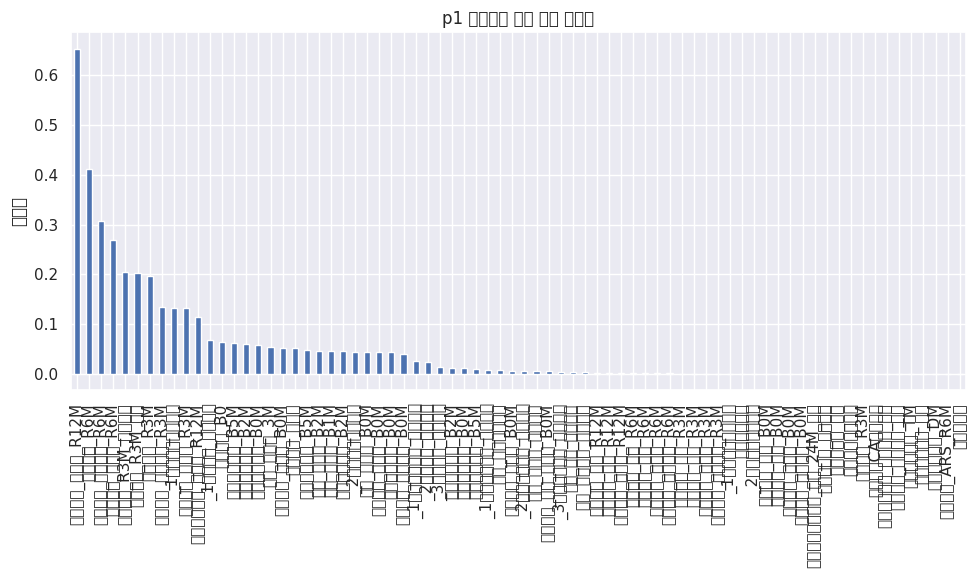

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
pca_components.loc['p1'].sort_values(ascending=False).plot(kind='bar')
plt.title('p1 주성분에 대한 변수 로딩값')
plt.ylabel('로딩값')
plt.tight_layout()
plt.show()


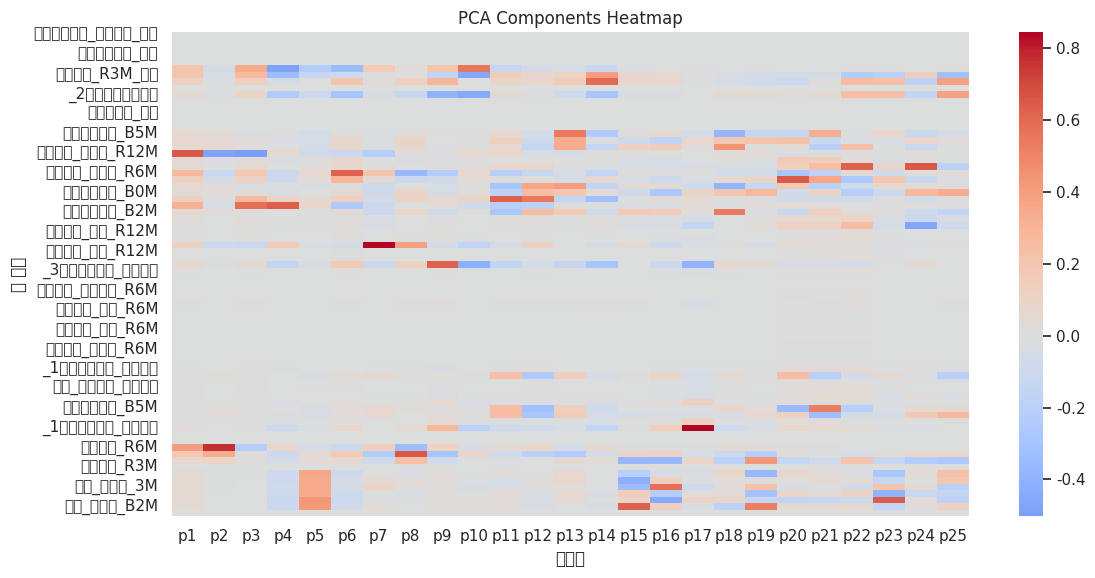

In [16]:
plt.figure(figsize=(12, 6))
sns.heatmap(pca_components.T, cmap='coolwarm', center=0)
plt.title('PCA Components Heatmap')
plt.xlabel('주성분')
plt.ylabel('원 변수')
plt.tight_layout()
plt.show()


In [17]:
# 차원축소
# PCA
pca = PCA(n_components=25)
pca_X = pca.fit_transform(X)

In [18]:
X = train_df.drop('Segment', axis=1)
y = train_df['Segment']

In [19]:
from sklearn.preprocessing import LabelEncoder

# 문자형 Segment를 숫자형으로 변환
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [20]:
print(le.classes_)
# 출력 예시: ['A' 'B' 'C' 'D' 'E']

['A' 'B' 'C' 'D' 'E']


In [21]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증'
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 모델의 최적의 하이퍼 파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 차원 축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 군집
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

# 학습 모델 저장을 위한 라이브러리
import pickle

In [22]:
# 교차검증을 통해 확인해본다.
model1 = XGBClassifier(tree_method='gpu_hist', predictor='gpu_predictor',
                       n_jobs=-1, verbosity=0, use_label_encoder=False)
model2 = XGBClassifier(tree_method='gpu_hist', predictor='gpu_predictor',
                       n_jobs=-1, verbosity=0, use_label_encoder=False)


# 교차 검증
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

r1 = cross_val_score(model1, X, y_encoded, scoring='accuracy', cv=kfold)
r2 = cross_val_score(model1, pca_X, y_encoded, scoring='accuracy', cv=kfold)

print(r1.mean())
print(r2.mean())

0.8969000000000001
0.8763433333333334
